# 앙상블 (Ensemble)

<br><hr>

## ✅배깅(bagging)
- **여러 개의 분류 모델을 조합해서 더 나은 성능을 내는 방법**
- 한 가지 분류 모델을 여러 개 만들어서 서로 다른 학습 데이터로 학습시킨 후(부트스트랩), 동일한 테스트 데이터에 대한 서로 다른 예측값들을 투표를 통해(aggregating) 가장 높은 예측값으로 최종 결론을 내리는 앙상블 기법
- 어원: **부트스트랩(bootstrap)** + **어그리게이팅(aggregating)**
- **과대적합이 되기 쉬운 모델에 상당히 적합한 앙상블**

<br><hr>

## ✅부트스트랩(Bootstrap)
- 데이터를 조금은 편향되도록 샘플링하는 기법
- 과대적합 모델의 특징이 학습 데이터에 대한 분산은 높고 편향은 적은 모델
- 데이터 샘플링 시 편향을 높임으로써 **분산이 높은 모델의 과대적합 위험을 줄이는 효과** 를 줌
- N개의 데이터를 총 K개의 데이터로 나누어 담을 때 **중복을 허용해서 데이터의 편향을 높임**
- 편향된 데이터로 학습된 K개의 의사결정 트리는 N개의 데이터로 학습된 1개의 의사결정 트리보다 편향이 높아 과대적합될 확률이 적어짐

<br>
<hr>

## ✅Aggregating
- 여러 분류 모델이 예측한 값들을 조합해서 하나의 결론을 도출하는 과정
- 결론은 **투표** 를 통해 결정

<br>

- **하드 보팅(Hard Voting)**
    - 배깅에 포함된 K개의 분류 모델에서 **최대 득표를 받은 예측값으로 결론을 도출**
    - 각 분류 모델은 최고의 확률을 갖는 분류값만을 aggregating할 때 리턴
    - 단순히 가장 많은 투표를 받은 분류값을 단순히 aggregating의 결론으로 도출

<br>

- **소프트 보팅(Soft Voting)**
    - 하드 보팅보다 더 정교한 투표 방식
    - 하드 보팅 같은 경우 각 분류 모델은 최고의 확률을 갖는 분류값만을 aggregating할 때 리턴하는 반면, 소프트 보팅은 **모든 분류값의 확률을 리턴**
    -  하드 보팅은 단순히 가장 많은 투표를 받은 분류값을 단순히 aggregating의 결론으로 도출하는 반면, 소프트 보팅은 각 분류값별 확률을 더한 값을 점수로 사용해 **최대 점수를 가진 분류값을 결론으로 도출** 함

<br><hr>

## ✅랜덤 포레스트 (Random Forest)
- **여러 의사결정 트리를 배깅해서 예측을 실행하는 모델**
- 배깅이 모든 분류 모델에 적용 가능하지만, 특히 과대적합되기 쉬운 의사결정 트리에 적용하면 확실히 과대적합을 줄여 성능이 높아지는 혜택을 보기 때문에 배깅은 많은 의사결정 트리 모델의 개선을 이뤘고, 여러 개의 나무들이 모여 있다는 개념에서 랜덤 프레스트라는 이름이 생겨남
- 의사결정 트리에서는 최적의 특징으로 트리를 분기하는 반면, 랜덤 포레스트는 각 노드에 주어진 데이터를 샘플링해서 일부 데이터를 제외한 채 최적의 특징을 찾아 트리를 분기함
- 이러한 과정에서 랜덤 포레스트는 또 한 번의 모델의 편향을 증가시켜 **과대적합의 위험을 감소** 시킴

<br><hr>

## ✅랜덤 포레스트 장/단점
#### 장점
1. 앙상블 효과로 의사결정 트리의 과대적합 단점 보완

#### 단점
1. 조정해야 할 하이퍼파라미터가 많음

<br><hr>

# 08-01. Random Forest

## 00. 기본 설정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier    # 랜덤포레스트
from sklearn.tree import DecisionTreeClassifier        # 의사결정트리

from sklearn.model_selection import cross_val_score  # 교차검증점수

## 01. 데이터 불러오기
##### *sklearn에서 제공하는 손글씨 데이터*

In [2]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

print('DV :\n', features)
print('\nIV :', labels)

DV :
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]

IV : [0 1 2 ... 8 9 8]


## 02. 교차검증
##### *교차검증을 10번 수행하여, 10번의 교차검증 평균 정확도를 저장*

In [3]:
# k-fold 교차검증
def cross_validation(classifier, features, labels):   # 모델, IV, DV
  cv_scores = []

  for i in range(10):       # 교차검증 10번
    scores = cross_val_score(classifier, features, labels,
                            cv=10,  # k-fold의 k값
                            scoring='accuracy')
    cv_scores.append(scores.mean())   # 10개의 데이터 중 하나의 값만 저장 >> 10개의 평균값이 cv_scores에 저장될 것임
  
  return cv_scores

In [4]:
# 데이터를 10개의 묶음으로 나눠 (9세트 훈련-1세트 검증)을 10번 반복
# >> 모든 데이터가 최소한 한 번씩 훈련-검증에 사용되는 효과
# >> 그때마다 정확도 점수를 return

In [5]:
# 의사결정트리 모델로 교차검증
dt_cv_score = cross_validation(DecisionTreeClassifier(), features, labels)

# 랜덤포레스트 모델 >> 의사결정트리 모델을 여러 개 만들기 떄문에 오래걸림
rf_cv_score = cross_validation(RandomForestClassifier(), features, labels)

In [6]:
# 모델의 정확도 확인
# 참고) 의사결정트리는 과대적합에 빠지기 쉬움, 앙상블은 그것을 보완
print(dt_cv_score)
print(rf_cv_score)

[0.8241433891992551, 0.8268963376784605, 0.8319056486654253, 0.8174363749224085, 0.8230229671011793, 0.8235940409683427, 0.8302513966480447, 0.8246617008069522, 0.8218994413407821, 0.8280198634388579]
[0.951576660459342, 0.9460086902545003, 0.9460086902545003, 0.9432184978274363, 0.9504531346989447, 0.9510273122284294, 0.9454593420235877, 0.9521384233395406, 0.9493482309124767, 0.9526908752327745]


## 03. 랜덤포레스트 vs. 의사결정트리 시각화
##### *라인 차트를 통해 의사결정트리보다 랜덤포레스트의 정확도가 높은 것을 확인*

In [7]:
cv_list = [
  ['random_forest', rf_cv_score],
  ['decision_tree', dt_cv_score]
]

# cv_list를 딕셔너리 형태로 변환해서 시작 주소값을 저장 
df = pd.DataFrame.from_dict(dict(cv_list))

<AxesSubplot: >

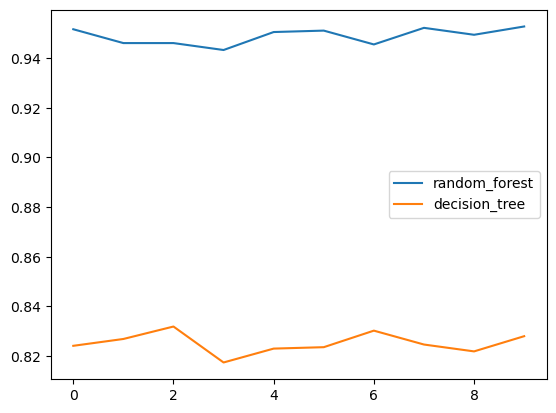

In [8]:
df.plot()

##### *의사결정트리 정확도 평균*

In [9]:
# 10개의 평균값이 있는 리스트 dt_cv_score를 하나의 평균값으로 만듬
np.mean(dt_cv_score)

0.8251831160769708

##### *랜덤포레스트 정확도 평균*

In [10]:
np.mean(rf_cv_score)

0.9487929857231532